# Xception Architecture
(Paper: https://arxiv.org/pdf/1610.02357.pdf)

#### Paper Summary
- 

<center><img src='./Images/Xception_Model.png' alt="Alternative text" align="center" /></center>

In [106]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, SeparableConv2D, ReLU, GlobalAveragePooling2D, Concatenate, Input, Dropout
from tensorflow.keras import Model

def xception_block(input, )

In [107]:
input = Input(shape=(299,299,3))
x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(input)
x = ReLU()(x)
x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)
x = ReLU()(x)




In [108]:
def conv1D(input, filters):
    return Conv2D(filters=filters, kernel_size=1,strides=2, padding='same')(input)

In [109]:
def xception_code(input, filter, second_filter,  not_first_last_block=False):
    conv_input = conv1D(input, second_filter)
    if not_first_last_block:
        input = ReLU()(input)
    x = SeparableConv2D(filters=filter, kernel_size=3, padding='same')(input)
    x = ReLU()(x)
    x = SeparableConv2D(filters=filter, kernel_size=3, padding='same')(x)
    x = MaxPool2D(pool_size=3, strides=2 , padding='same')(x)
    x = Concatenate()([x, conv_input])
    return x


def middleflow(input):
    for i in range(3):
        x = ReLU()(input)
        x = SeparableConv2D(filters=728, kernel_size=3, padding='same')(x)
    return Concatenate()([x, input])

In [110]:
# Entry Flow 
input = Input(shape=(299,299,3))
x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(input)
x = ReLU()(x)
x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = ReLU()(x)
x = xception_code(x, 128,128)
x = xception_code(x, 256,256)
x = xception_code(x, 728,728)

#Middle Flow
for i in range(8):
    x = middleflow(x)


# Exit Flow 
x = xception_code(x, 728,1024)
x= SeparableConv2D(filters=1536, kernel_size=3, padding='same')(x)
x = ReLU()(x)
x = SeparableConv2D(filters=2048, kernel_size=3, padding='same')(x)
x = ReLU()(x)
x = GlobalAveragePooling2D()(x)
output = Dense(1000, activation='softmax')(x)
model = Model(input,output)

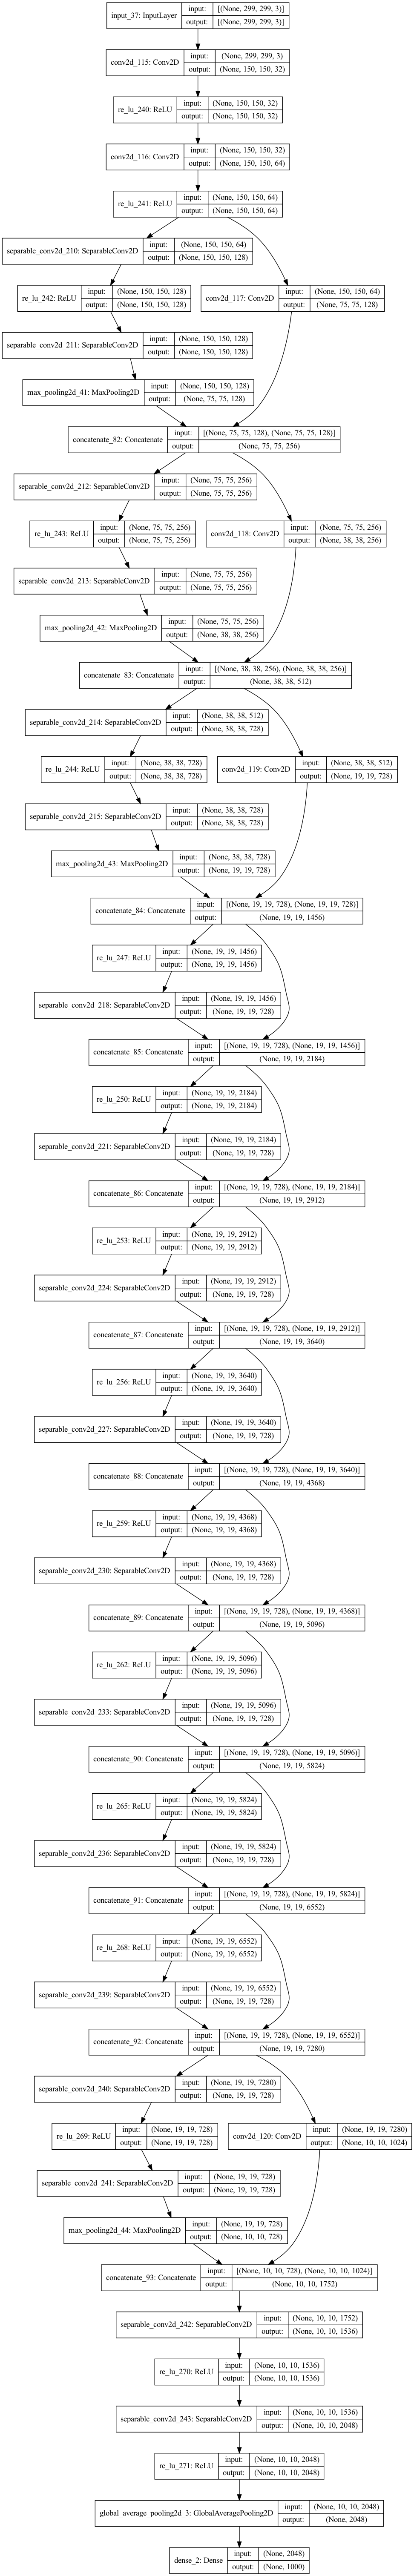

In [111]:
tf.keras.utils.plot_model(model, show_shapes=True)